In [0]:
#importing the libraries
from sklearn.datasets import load_digits

In [0]:
digits = load_digits()

In [4]:
print("Image Data Shape",digits.data.shape)

Image Data Shape (1797, 64)


In [5]:
print("Label data shape",digits.target.shape)

Label data shape (1797,)


In [0]:
#showing the images and labels
import numpy as np
import matplotlib.pyplot as plt

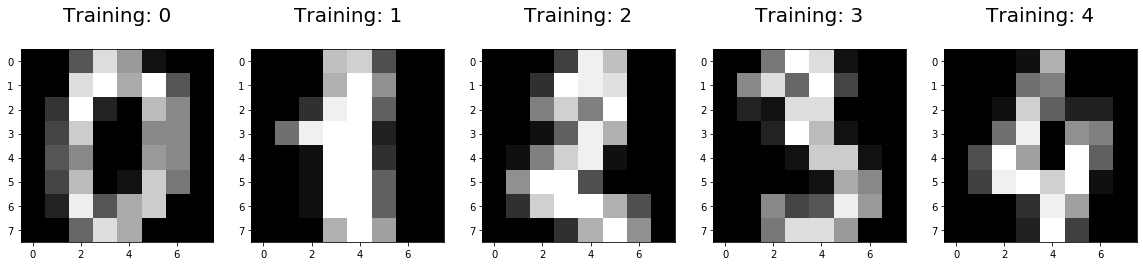

In [11]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize =20)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.25, random_state=0)

4-step modelling pattern

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log = LogisticRegression()

In [18]:
log.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
log.predict(x_test[0].reshape(1,-1))

array([2])

In [20]:
log.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [0]:
predictions = log.predict(x_test)

In [0]:
score = log.score(x_test,y_test)

In [23]:
print(score)

0.9511111111111111


In [0]:
#showing confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [0]:
cm= metrics.confusion_matrix(y_test,predictions)

In [28]:
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 1, 'Accuracy Score: 0.9511111111111111')

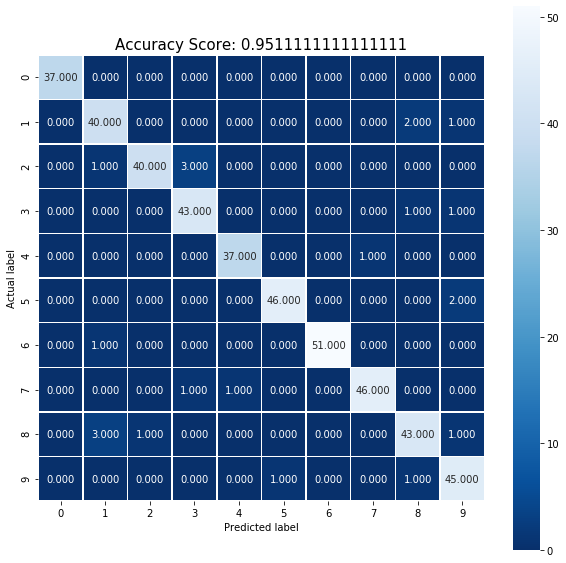

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size =15)